<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> ANGIUS Marco<br>
<b> Student 2:</b> AVALLE Giorgio  
<b> Group name:</b> deeplearn46
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
from copy import deepcopy
import numpy as np
import matplotlib

<div class="alert alert-info">
<h2>Please note</h2>
The Python code you provided us has been modified a little bit, in order to implement
<ul>
    <li>the Mini-batch SGD algorithm (both in train and train_xe methods)</li>
    <li>the possibility to use some of the activation functions with ndarrays</li>
    <li>the legend inside the graphs</li>
    <li>an alternative version of predict (predict_xe), to be used together with train_xe in order to internally call feedforward_xe</li>
</ul>
</div>

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2, x6, x7 = 0.8, 0.2, 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5
y = 0.4

x3 = sigmoid(w13*x1 + w23*x2 + w63*x6)
x4 = sigmoid(w14*x1 + w24*x2 + w64*x6)
x5 = sigmoid(w35*x3 + w45*x4 + w75*x7)
old_forward = x5

print("=== FORWARD PASS 1 ===")
print("Output =", x5)

# o_j = x_j
# special case formula (sigmoid tf)
# output layer
d_u5 = 2 * (x5 - y) * x5 * (1 - x5)
d_w35 = d_u5 * x3
d_w45 = d_u5 * x4
d_w75 = d_u5 * x7
# hidden layer
d_u3 = (d_u5 * w35) * x3 * (1 - x3)
d_u4 = (d_u5 * w45) * x4 * (1 - x4)
d_w13 = d_u3 * x1
d_w23 = d_u3 * x2
d_w63 = d_u3 * x6
d_w14 = d_u4 * x1
d_w24 = d_u4 * x2
d_w64 = d_u4 * x6

w13 -= lr*d_w13
w14 -= lr*d_w14
w23 -= lr*d_w23
w24 -= lr*d_w24
w63 -= lr*d_w63
w64 -= lr*d_w64
w35 -= lr*d_w35
w45 -= lr*d_w45
w75 -= lr*d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

x3 = sigmoid(w13*x1 + w23*x2 + w63*x6)
x4 = sigmoid(w14*x1 + w24*x2 + w64*x6)
x5 = sigmoid(w35*x3 + w45*x4 + w75*x7)
old_backward = x5

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192797
=== FORWARD PASS 2 ===
Output = 0.40648823589210115


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are going to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, batch_inputs):
        '''
        Feedforward step, over the current batch
        '''
        batch_size = len(batch_inputs)
        # INPUT LAYER
        # introduce the bias input neuron's output
        self.o_input = np.concatenate((np.matrix(batch_inputs), np.ones((batch_size, 1))), axis=1)

        # HIDDEN layer
        # evaluate activations for hidden neurons
        # U_h = X W1'
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)  
        # evaluate the outputs for hidden neurons
        # O_h = f(U_h)
        self.o_hidden = self.transfer_f(self.u_hidden)
        
        # introduce the bias input neuron's output
        self.o_hidden = np.concatenate((self.o_hidden, np.ones((batch_size, 1))), axis=1)

        # OUTPUT layer
        # evaluate activations for output neurons
        # U_o = O_h W2'
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)  
        # evaluate the outputs for output neurons
        # Y = f(U_o)
        self.o_output = self.transfer_f(self.u_output)


<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1)

# init the output data structure
model.o_output = np.ones((2, 1))

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0, 0])
print('The previous was: ', old_forward)

Output = 0.5597295991095776
The previous was:  0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, batch_targets, learning_rate=5.0):
        '''
        Backforward step, over the current batch
        '''
        batch_size = len(batch_targets)
        # OUTPUT layer partial derivatives
        # dE/du_o = 2 (Y - T) .* f'(U)
        self.dE_du_output = 2/batch_size * np.multiply(
                                    # Y - T
                                    self.o_output - batch_targets,
                                    # f'(U)
                                    self.transfer_df(self.u_output)
                                )
        
        # dE/dw_o = o_h' dE/du_o
        dE_dw_output = np.dot(
                                # o_h'
                                self.o_hidden.T,
                                # dE/du_o
                                self.dE_du_output
                            )
        
        
        # HIDDEN layer partial derivatives
        # dE/du_h = (dE/du_o W_ho') .* f'(u_h)
        self.dE_du_hidden = np.multiply(
                                # dE/du_o W_ho
                                # we need to delete the right-most column, because of the presence of the bias hidden neuron
                                np.delete(
                                    np.dot(
                                        # dE/du_o
                                        self.dE_du_output,
                                        # W_ho'
                                        self.W_hidden_to_output.T
                                    ), 
                                    -1,  # last index
                                    1    # for the columns
                                ),
                                # f'(u_h)
                                self.transfer_df(self.u_hidden)
                                # np.multiply(self.o_hidden, (1 - self.o_hidden))
                            )
        
        # dE/dw_h = o_i' dE/du_h
        dE_dw_hidden = np.dot(
                                # o_i'
                                self.o_input.T,
                                # dE/du_h
                                self.dE_du_hidden
                            )
        
        # WEIGHTS updates
        self.W_hidden_to_output -= learning_rate * dE_dw_output
        self.W_input_to_hidden  -= learning_rate * dE_dw_hidden
        

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1)

# init the output data structure
model.o_output = np.ones((2, 1))

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0, 0])
print("Previous was:", old_backward)


W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = 0.40648823589210104
Previous was: 0.40648823589210115


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


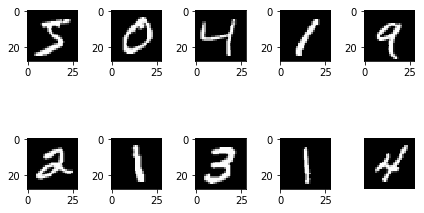

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Some common variables
input_layer_size = 784
output_layer_size = 10
learning_rates = [0.1, 1., 10.]

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

## Small dataset - Mini Batch SGD

In [10]:
batch_size = round(len(small_training_data[0])/32 + 0.5)

Training time: 19.216991424560547


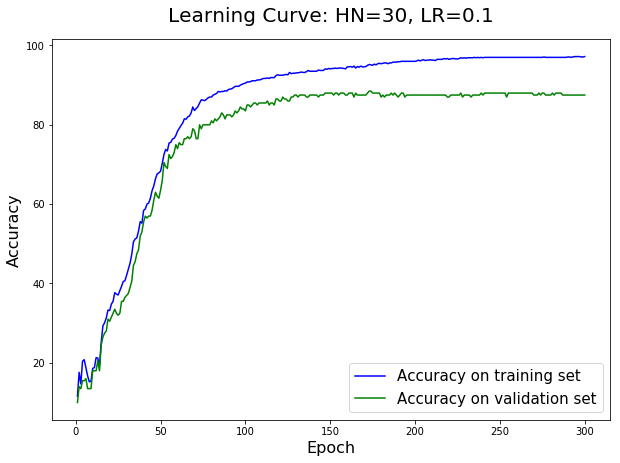

Training time: 19.022302627563477


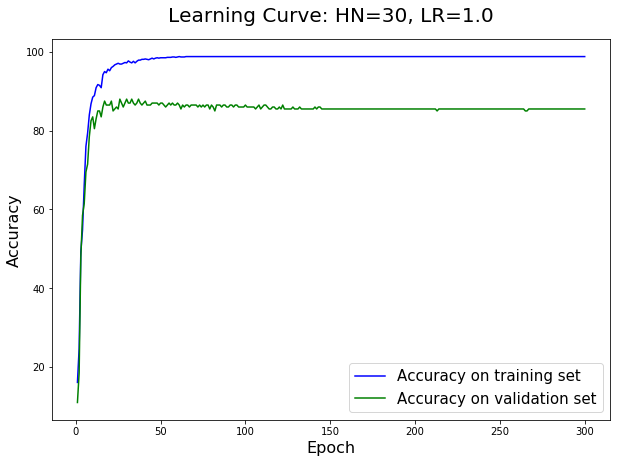

Training time: 19.064422607421875


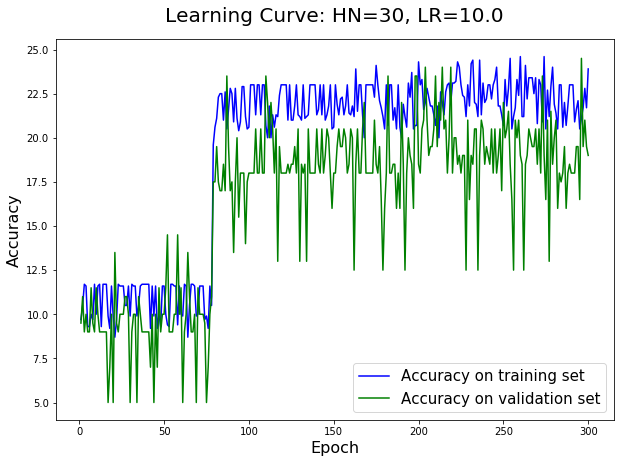

In [11]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 18.26473832130432


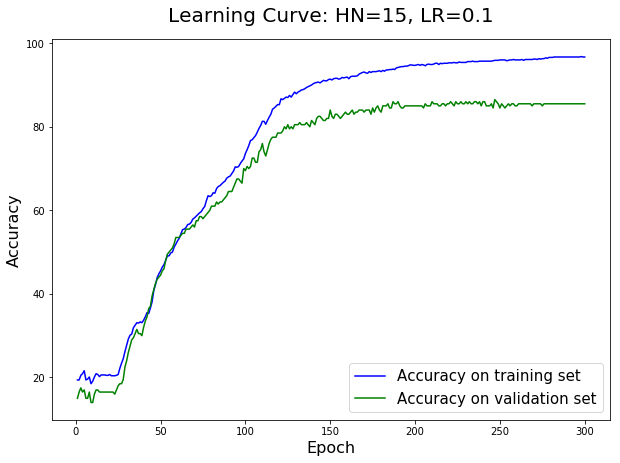

Training time: 17.683680057525635


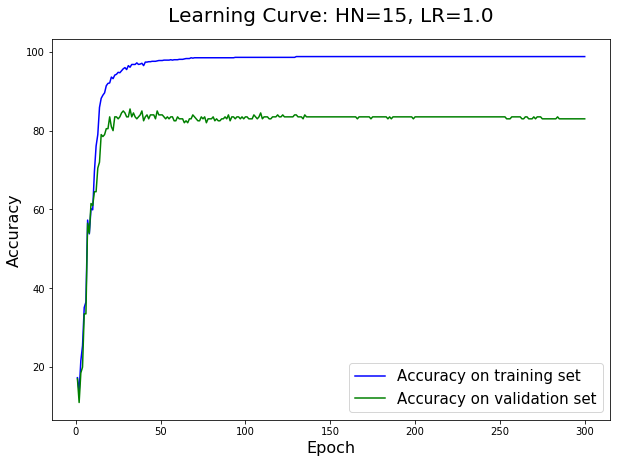

Training time: 17.811577796936035


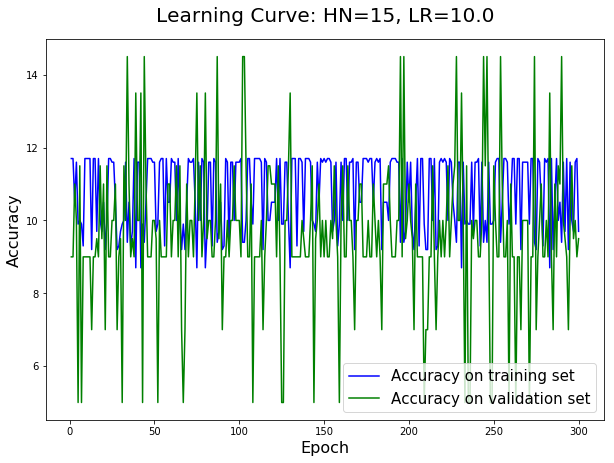

In [12]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 23.673203945159912


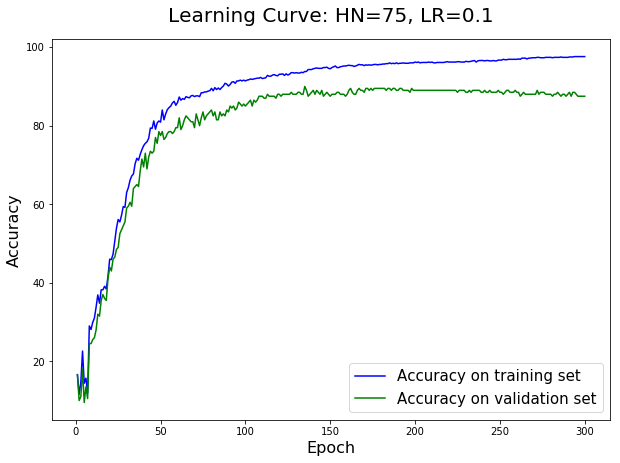

Training time: 23.878235816955566


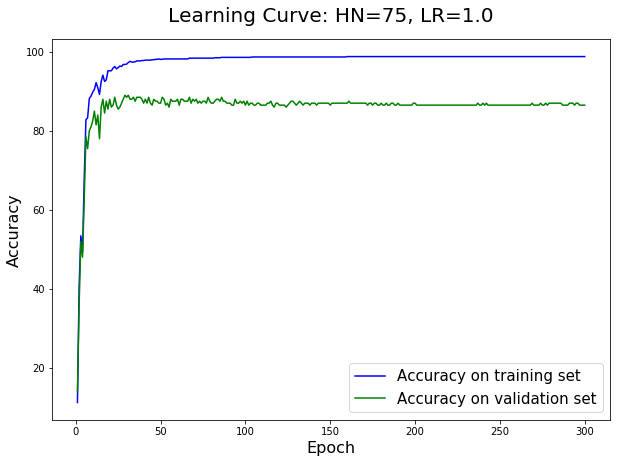

Training time: 23.673710584640503


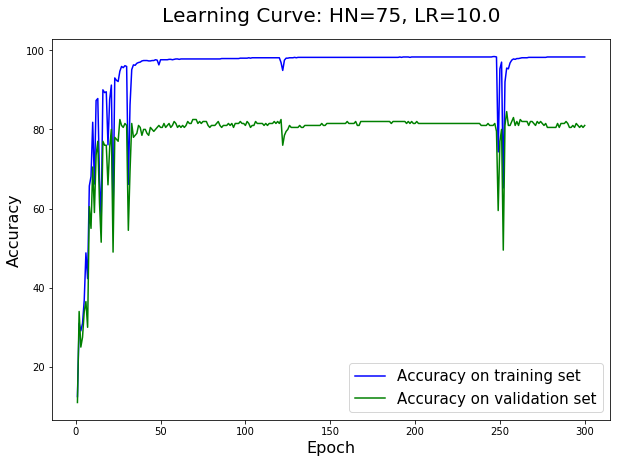

In [13]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<div class="alert alert-warning">
<b>Comment</b>: using the mini-batch approach over the small dataset, we can see that the best learning rate we can use among the ones proposed is 1.0<br>
Also 0.1 is able to achieve nice results, but it is slower: 10.0, instead, is too much (we have strong oscillations for the accuracy level during the training).<br><br>
Considering the number of hidden neurons, obtained results are more or less the same: 75 hidden neurons lead to a slightly better result, but increasing the number of neurons we are going to increase also the training required time. 
</div>

## Small dataset - Gradient Descent

In [14]:
batch_size = len(small_training_data[0])

Training time: 16.471077919006348


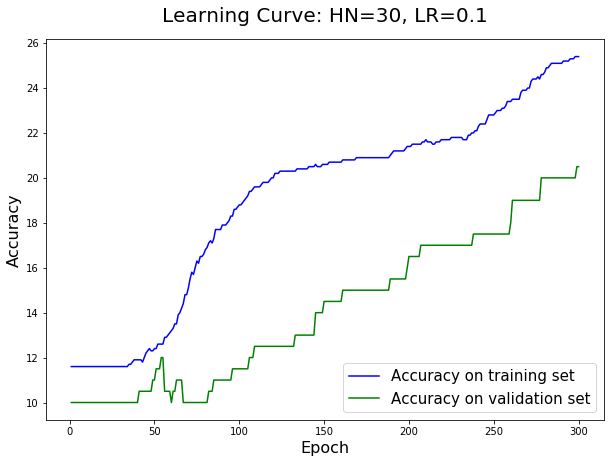

Training time: 16.47364044189453


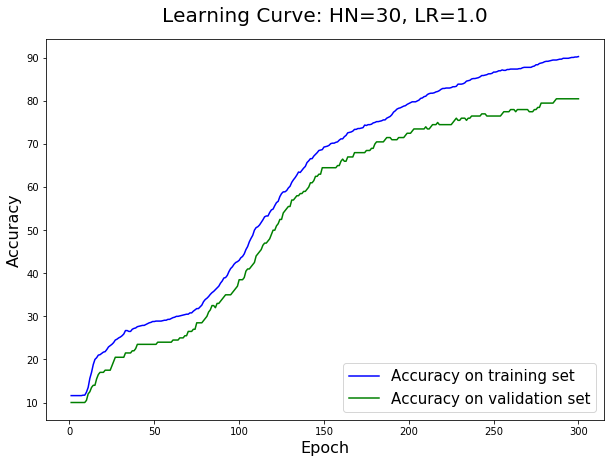

Training time: 16.49707055091858


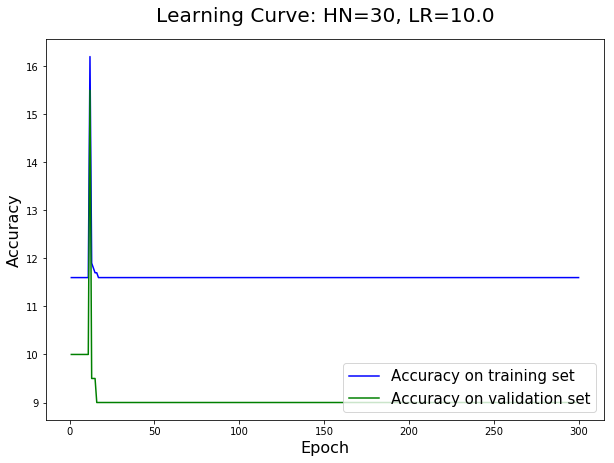

In [15]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 15.631894588470459


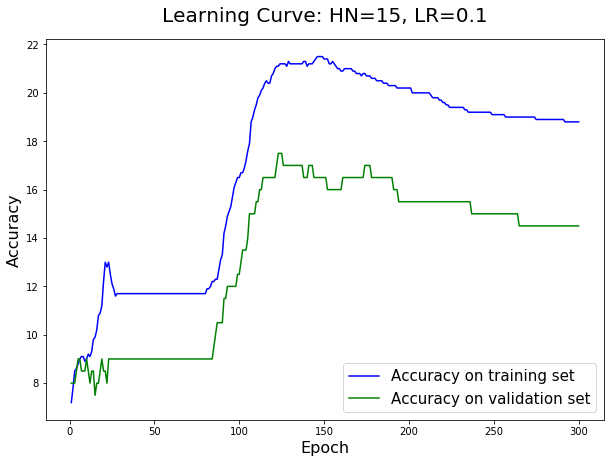

Training time: 15.738615274429321


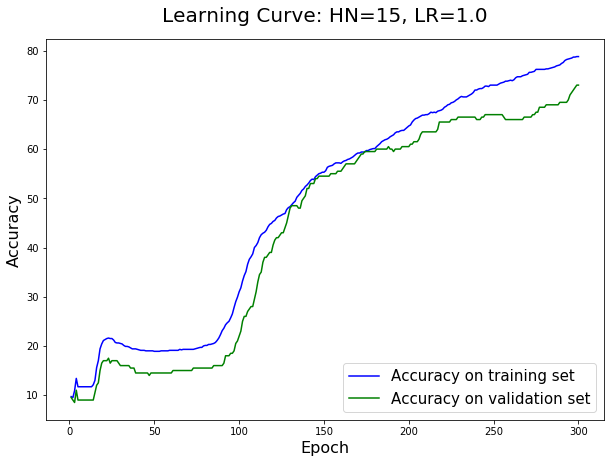

Training time: 15.63444447517395


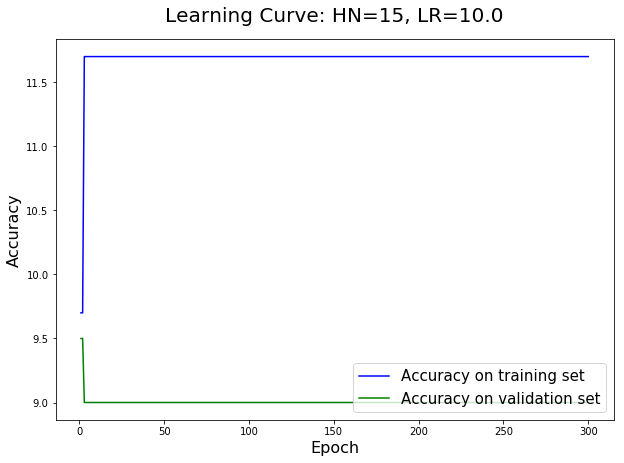

In [16]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 19.357571125030518


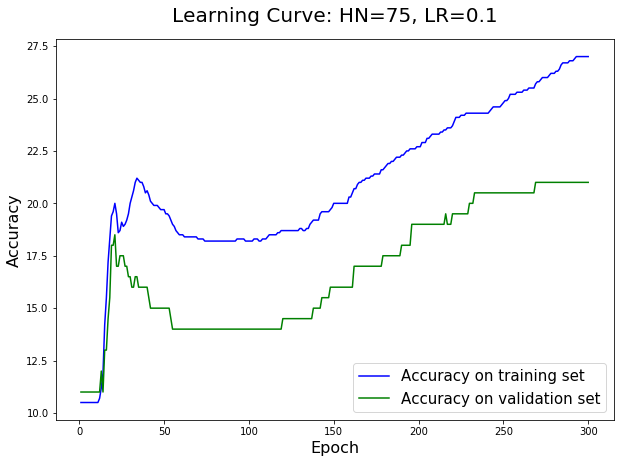

Training time: 19.387715339660645


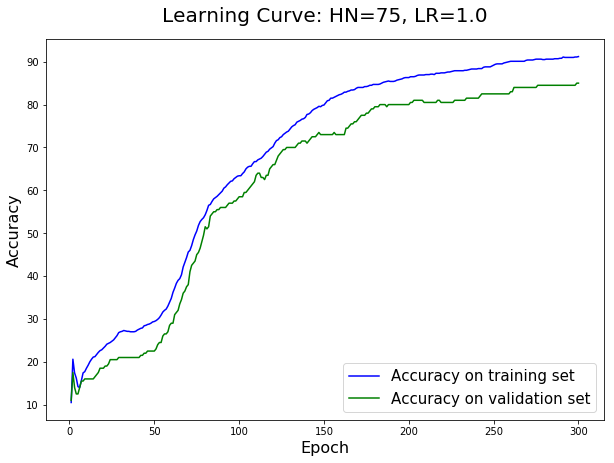

Training time: 19.954429388046265


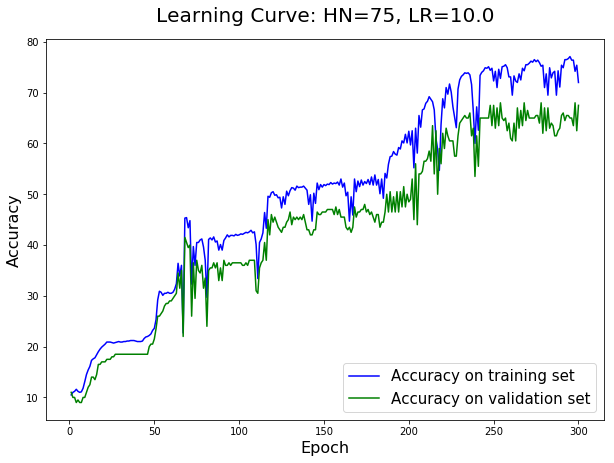

In [17]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

<div class="alert alert-warning">
<b>Comment</b>: we are now applying the gradient descent training algorithm over the small dataset. About the obtained results, we can say similar considerations as before (about learning rate and number of hidden layer's neurons): but we can clearly see that the accuracy is now far worse than before. As a conclusion, we can state that the mini-batch is preferrable to adopt.
</div>

## Very small dataset - Mini-batch SGD

In [18]:
batch_size = round(len(vsmall_training_data[0])/8 + 0.5)

Training time: 1.8932685852050781


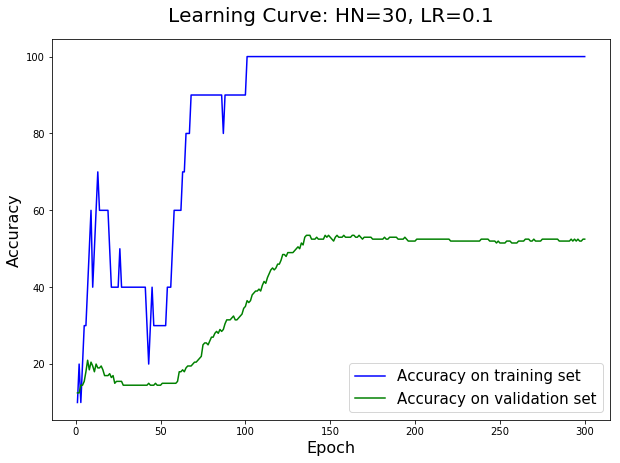

Training time: 1.8936102390289307


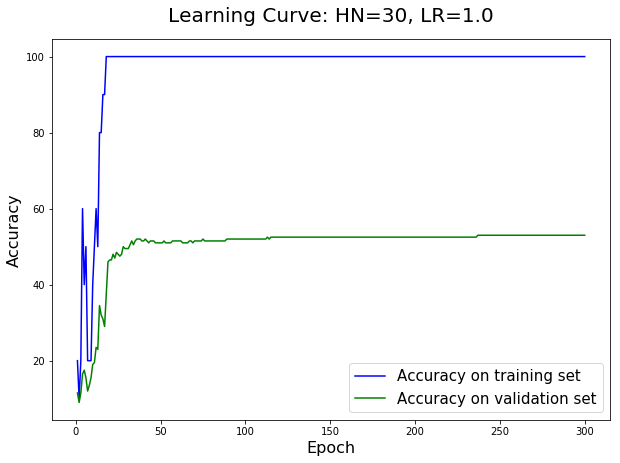

Training time: 1.9838175773620605


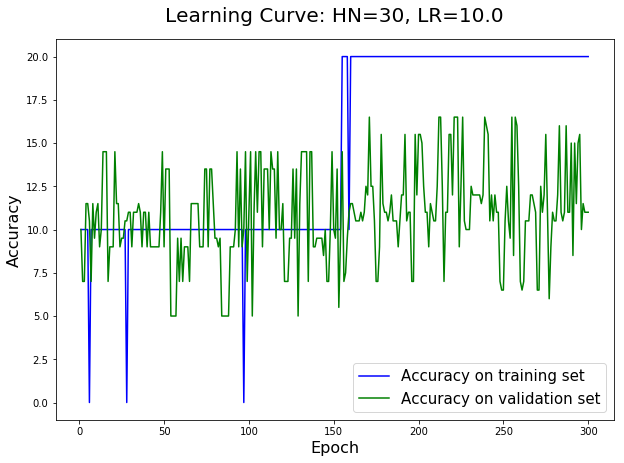

In [19]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 1.7542479038238525


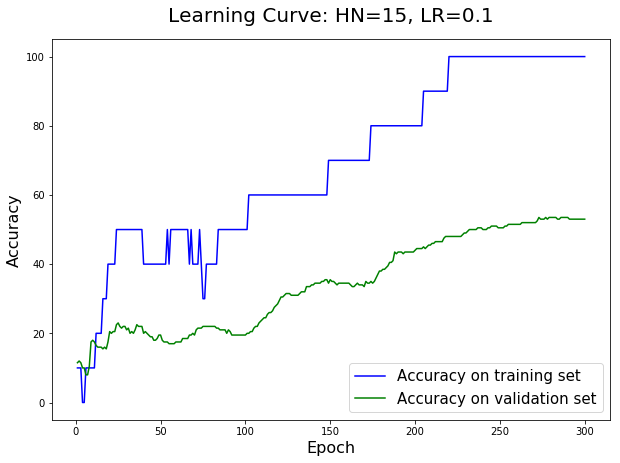

Training time: 1.7992877960205078


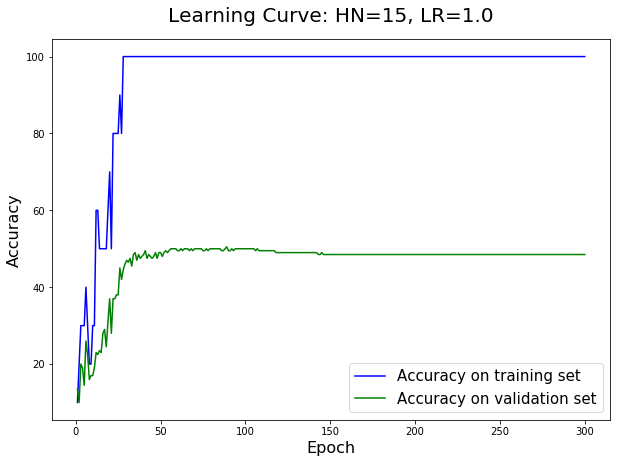

Training time: 1.7377796173095703


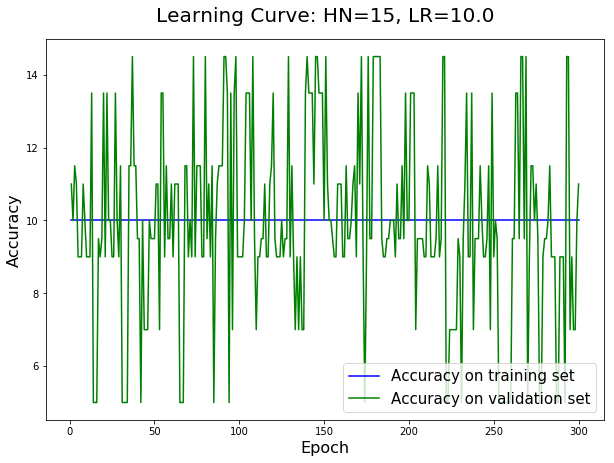

In [20]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 2.4154434204101562


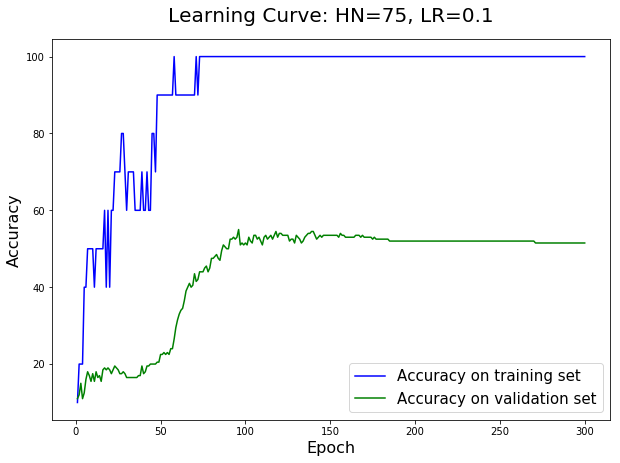

Training time: 2.4214882850646973


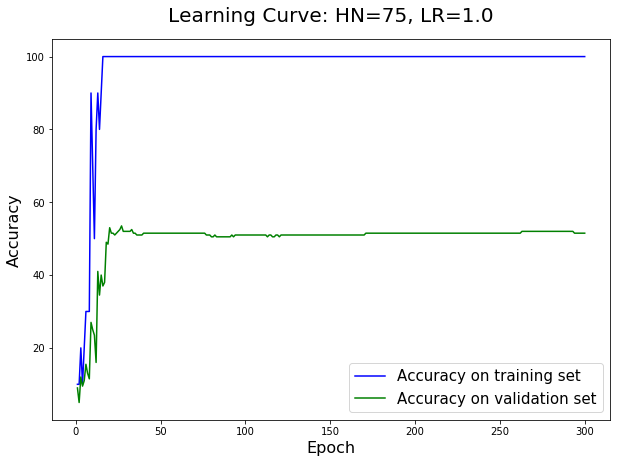

Training time: 2.465776205062866


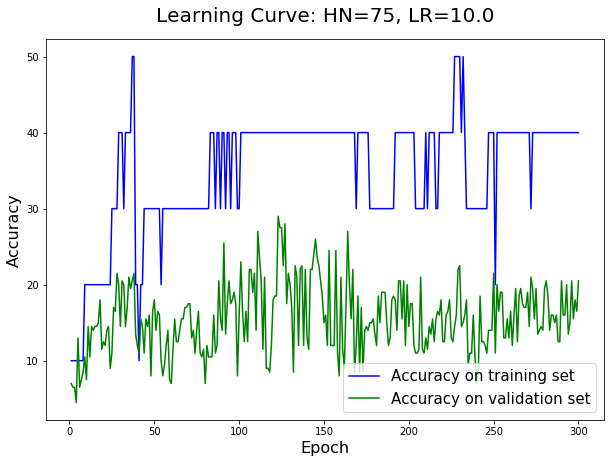

In [21]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<div class="alert alert-warning">
<b>Comment</b>: we are now applying the mini-batch SGD training algorithm over the tiny dataset. Considerations about learning rates and hidden layer's neurons are still the same, but we can see here that the accuracy on the validation set is never really high (about 50%, in the best cases).<br><br>
The reason of that is the size of the training set we are using to train the network: the little amount of samples we are considering is not representative of all the possible data. Because of that, we see that test results on validation data are poor: in other words, the network overfits the very small training set we have provided. 
</div>

## Very small dataset - Gradient Descent

In [22]:
batch_size = len(small_training_data[0])

Training time: 1.526416540145874


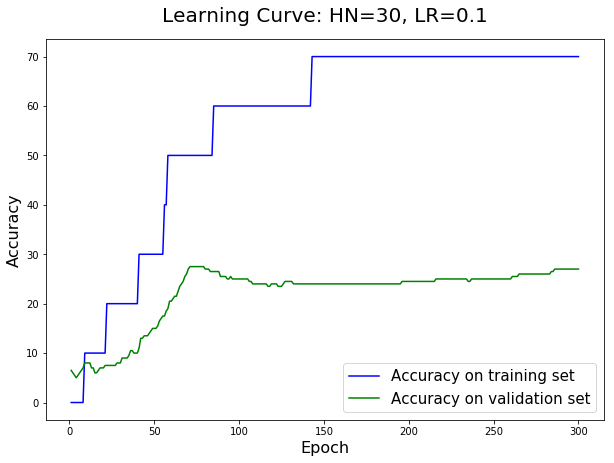

Training time: 1.5229170322418213


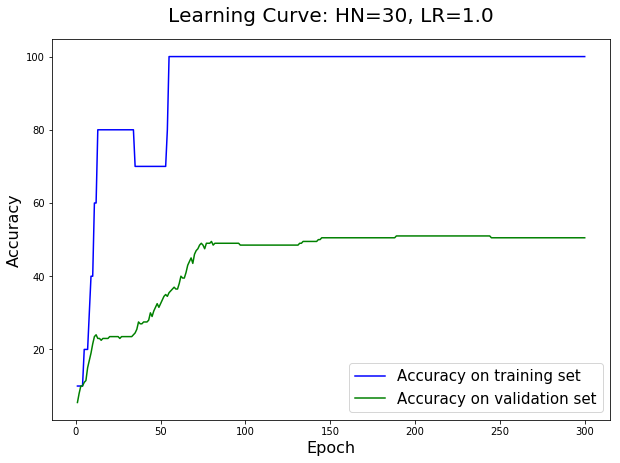

Training time: 1.5208380222320557


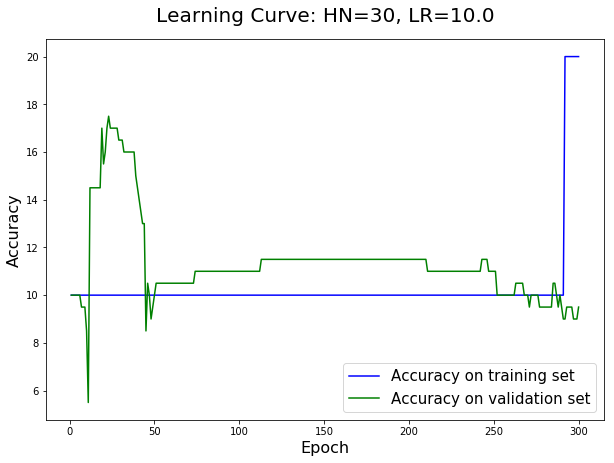

In [23]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 1.4815752506256104


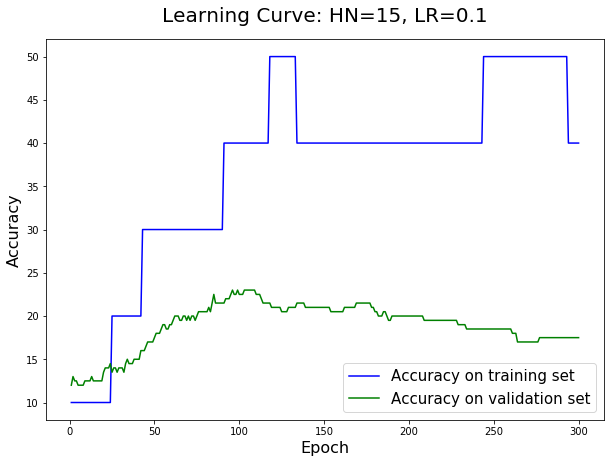

Training time: 1.4480922222137451


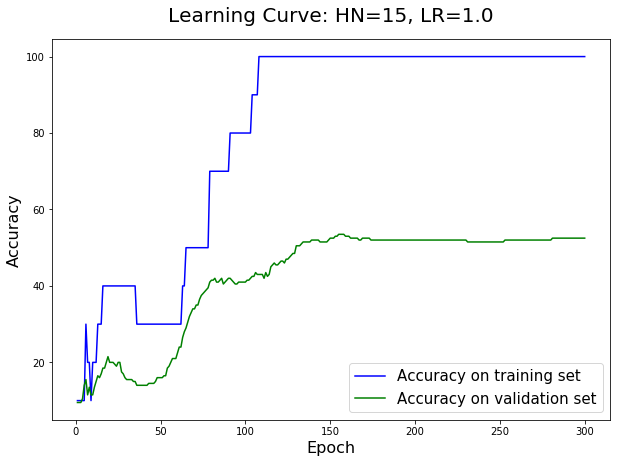

Training time: 1.4946353435516357


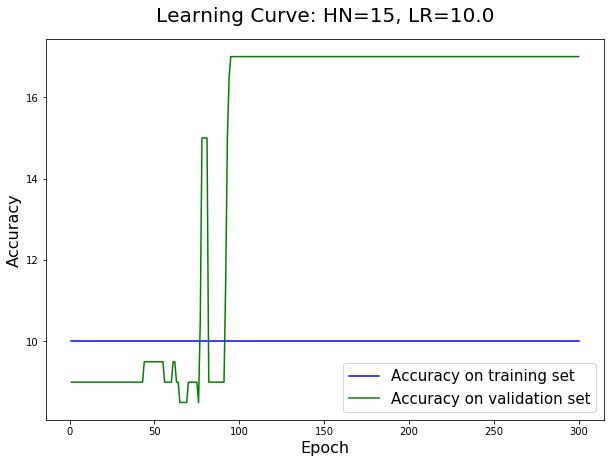

In [24]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 1.857172966003418


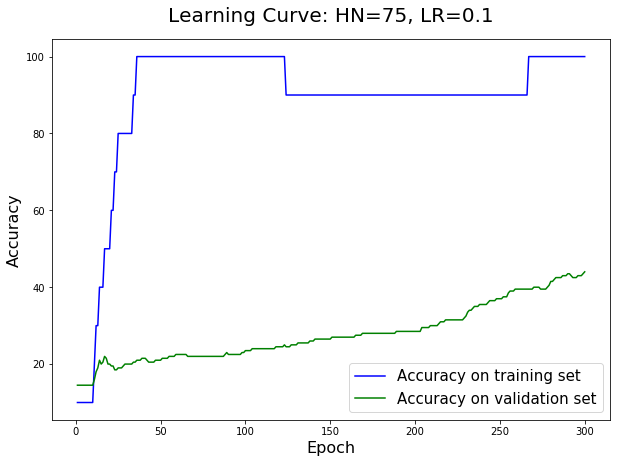

Training time: 1.7937164306640625


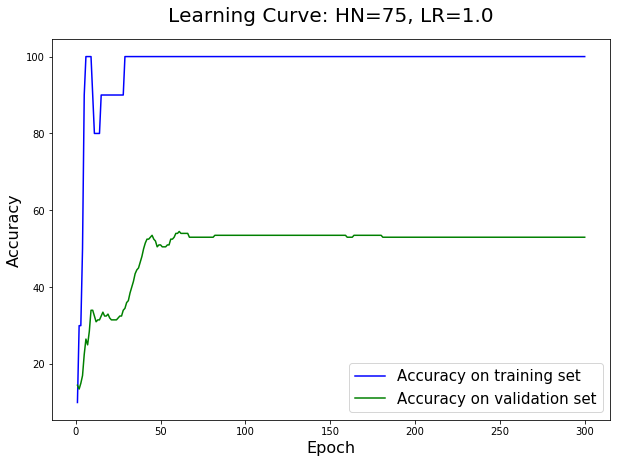

Training time: 1.7921748161315918


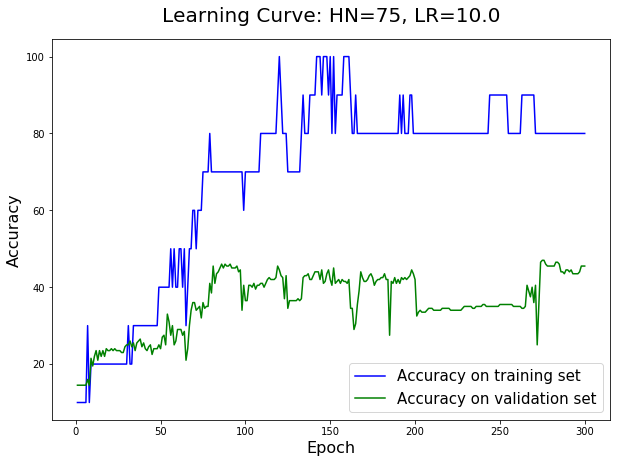

In [25]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(vsmall_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<div class="alert alert-warning">
<b>Comment</b>: applying the gradient descent training algorithm over the tiny dataset we do not observe important differences. Results are worse, but considerations done before are still the same here.
</div>

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class="alert alert-warning">
<b>Answer</b>: please, see the comments to the graphs above
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class="alert alert-warning">
<b>Answer</b>: we obtained best results using learning rate = 1.0 and number of hidden neurons = 75.<br>
The reason is:
<ul>
    <li>other learning rates are not able to achieve the same performances on validation (10.0: too high) or requires more training time to achieve the same performances level (0.1: too slow). 1.0 is a good possible solution, where training speed and results accuracy are balanced</li>
    <li>other possible numbers of hidden neurons usually lead us to similar results (sometimes worse ones), but after more epochs. 75 is a good value because it is not so high to compromise the complexity of the model. In that case, we would have more overfitting (so, lower accuracy on the validation data) and a single training epoch would require large amount of time</li>
</ul>
</div>

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

## Entire dataset - Mini Batch SGD

In [10]:
batch_size = round(len(training_data[0])/128 + 0.5)

Training time: 867.2086808681488


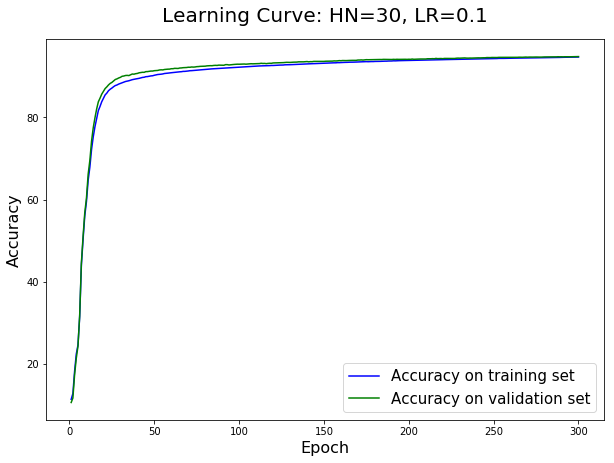

Training time: 867.6301698684692


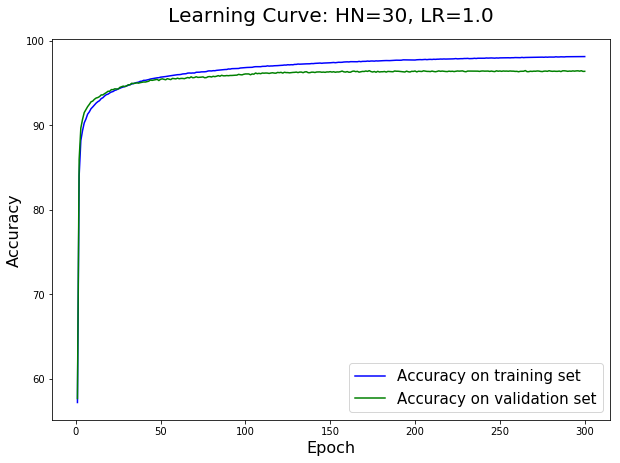

Training time: 872.950959444046


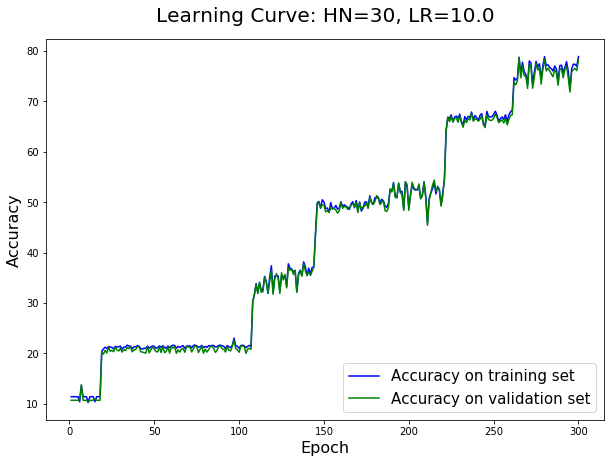

In [ ]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 882.1090970039368


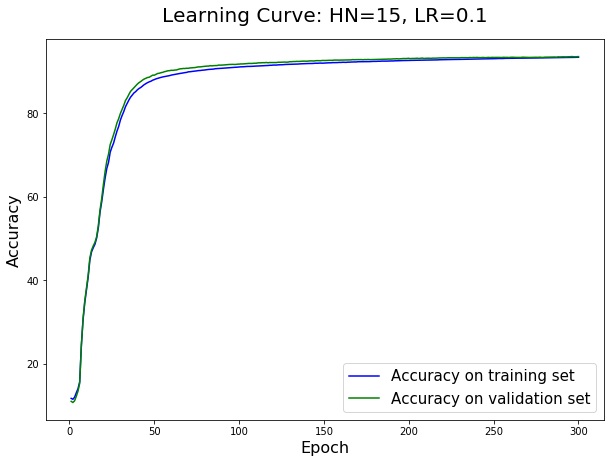

Training time: 863.689704656601


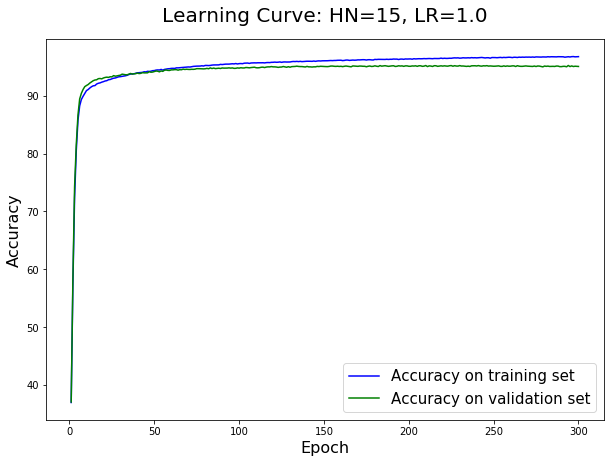

Training time: 848.1392710208893


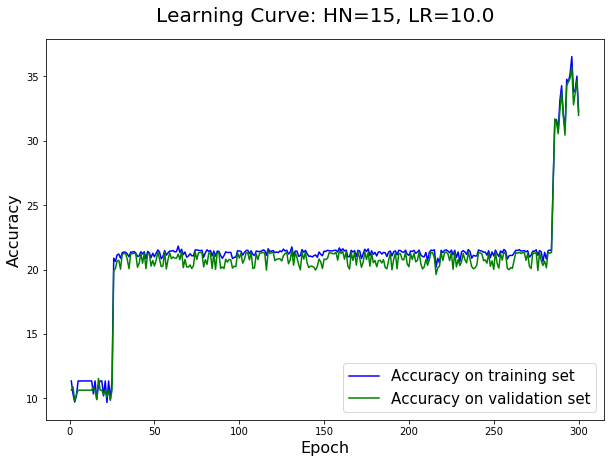

In [11]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 1058.1040160655975


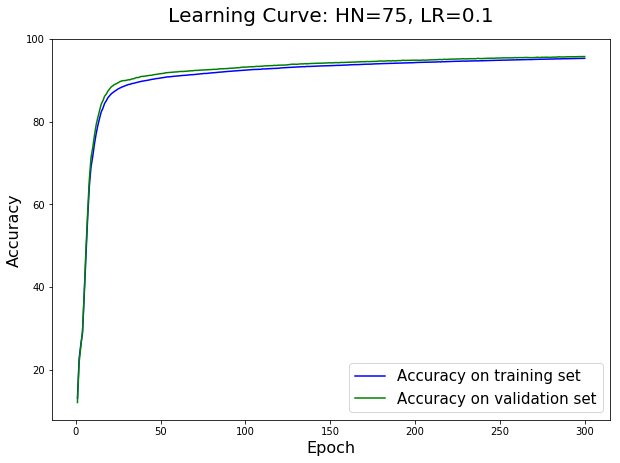

Training time: 1058.920488357544


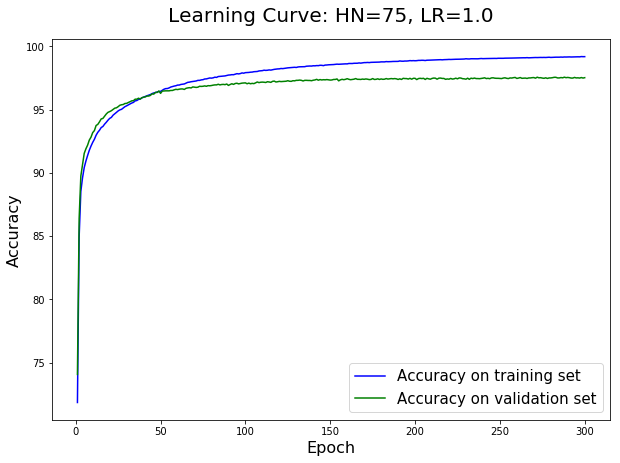

Training time: 1082.7140004634857


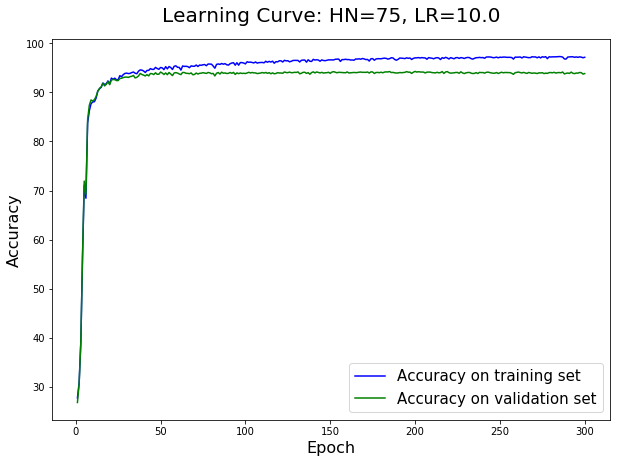

In [12]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

## Entire dataset - Gradient Descent

In [13]:
batch_size = len(training_data[0])

Training time: 988.5833044052124


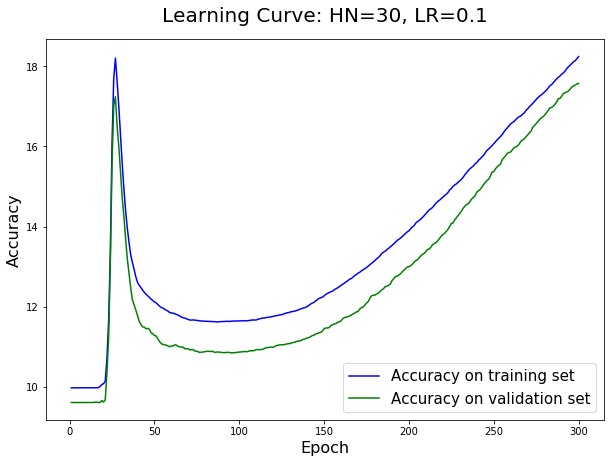

Training time: 991.8300623893738


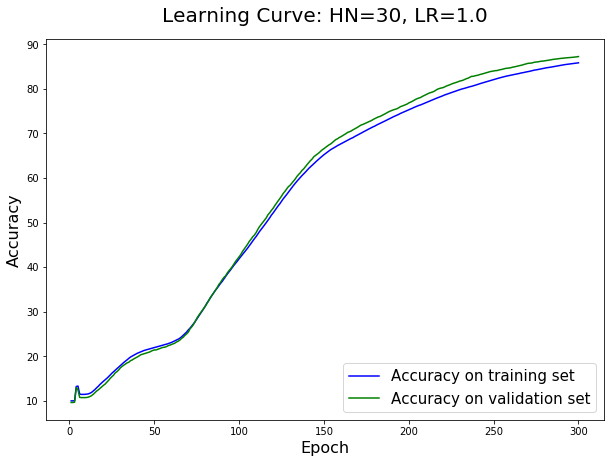

Training time: 977.1928980350494


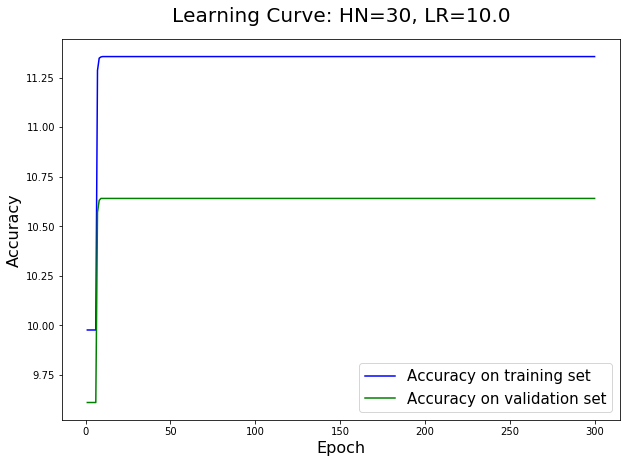

In [14]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 940.3005096912384


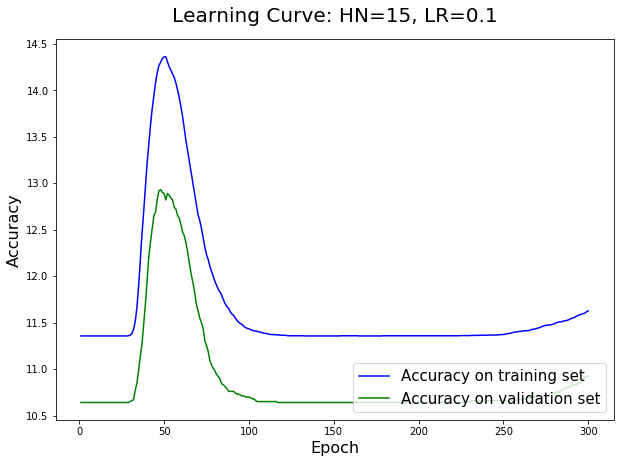

Training time: 925.2709774971008


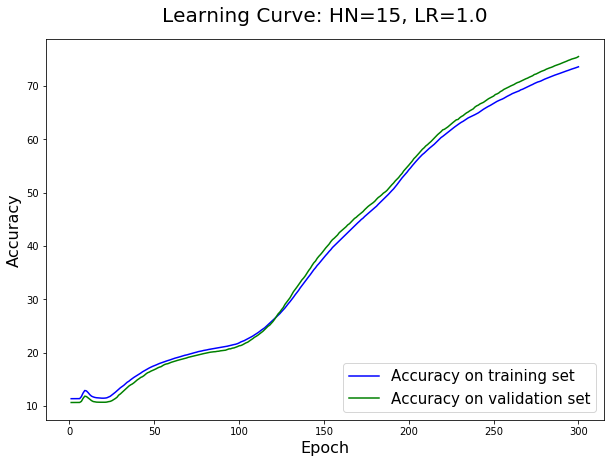

Training time: 923.5112624168396


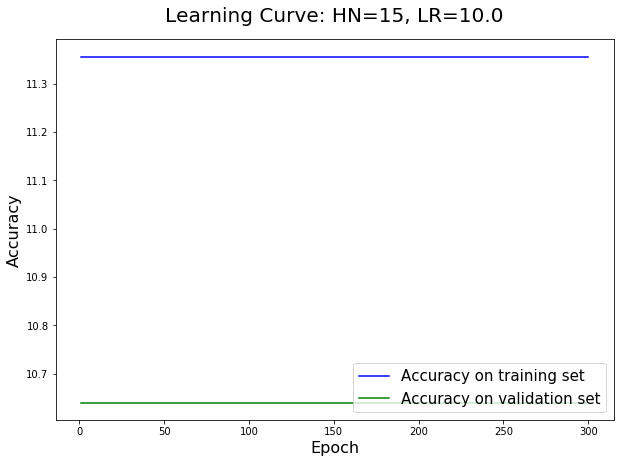

In [15]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 1124.8900408744812


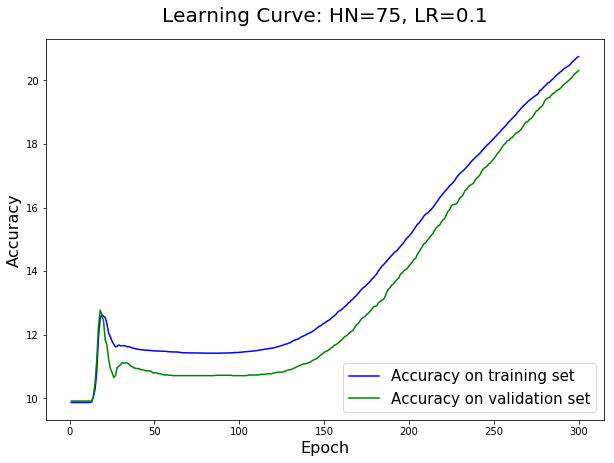

Training time: 1136.6037259101868


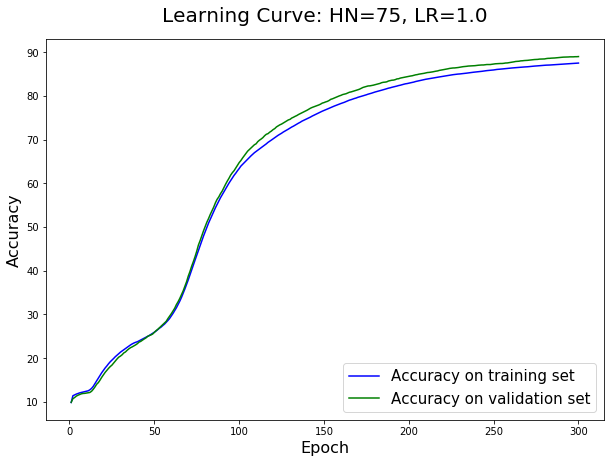

Training time: 1117.9080564975739


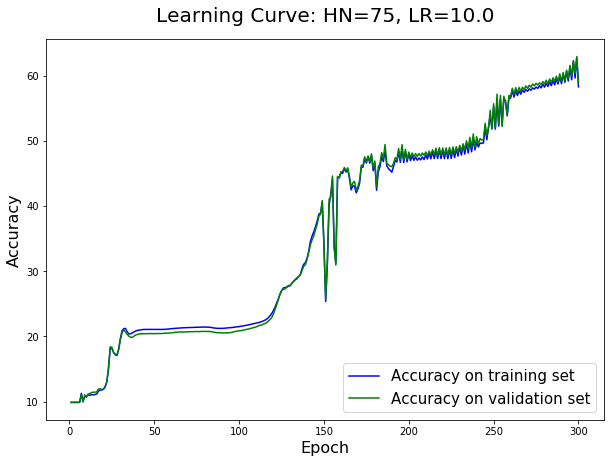

In [16]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model.W_input_to_hidden), deepcopy(mnist_model.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model.weights_init(*initial_weights)
    mnist_model.train(training_data, validation_data, learning_rate=lr, batch_size=batch_size)

<div class="alert alert-warning">
<b>Answer</b>: considerations are similar to the previous ones, for both the adopted training algorithms. What we can notice now is that we are able to achieve higher accuracy levels: the dataset is bigger and able to represent better all the possible scenarios. 
</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

<div class="alert alert-warning">
<b>Answer</b>: $\frac{\partial L_{xe}}{\partial u_i} = o_{i} - t_{i}$
</div>

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [13]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, batch_inputs):
        '''
        Feedforward step, over the current batch (softmax activation function for the output)
        '''
        batch_size = len(batch_inputs)
        # INPUT LAYER
        # introduce the bias input neuron's output
        self.o_input = np.concatenate((np.matrix(batch_inputs), np.ones((batch_size, 1))), axis=1)

        # HIDDEN layer
        # evaluate activations for hidden neurons
        # U_h = X W1'
        self.u_hidden = np.dot(self.o_input, self.W_input_to_hidden)  
        # evaluate the outputs for hidden neurons
        # O_h = f(U_h)
        self.o_hidden = self.transfer_f(self.u_hidden)
        
        # introduce the bias input neuron's output
        self.o_hidden = np.concatenate((self.o_hidden, np.ones((batch_size, 1))), axis=1)

        # OUTPUT layer
        # evaluate activations for output neurons
        # U_o = O_h W2'
        self.u_output = np.dot(self.o_hidden, self.W_hidden_to_output)  
        # evaluate the outputs for output neurons
        # Y = softmax(U_o)
        self.o_output = softmax(self.u_output)        
        
    def backpropagate_xe(self, batch_targets, learning_rate=5.0):
        '''
        Backforward step, over the current batch (cross-entropy is the cost function)
        '''
        batch_size = len(batch_targets)
        # OUTPUT layer partial derivatives
        # dE/du_o = Y - T
        self.dE_du_output = self.o_output - batch_targets        
        # dE/dw_o = o_h' dE/du_o
        dE_dw_output = np.dot(
                                # o_h'
                                self.o_hidden.T,
                                # dE/du_o
                                self.dE_du_output
                            )
        
        
        # HIDDEN layer partial derivatives
        # dE/du_h = (dE/du_o W_ho') .* f'(u_h)
        self.dE_du_hidden = np.multiply(
                                # dE/du_o W_ho
                                # we need to delete the right-most column, because of the presence of the bias hidden neuron
                                np.delete(
                                    np.dot(
                                        # dE/du_o
                                        self.dE_du_output,
                                        # W_ho'
                                        self.W_hidden_to_output.T
                                    ), 
                                    -1,  # last index
                                    1    # for the columns
                                ),
                                # f'(u_h)
                                self.transfer_df(self.u_hidden)
                                # np.multiply(self.o_hidden, (1 - self.o_hidden))
                            )
        
        # dE/dw_h = o_i' dE/du_h
        dE_dw_hidden = np.dot(
                                # o_i'
                                self.o_input.T,
                                # dE/du_h
                                self.dE_du_hidden
                            )
        
        # WEIGHTS updates
        self.W_hidden_to_output -= learning_rate * dE_dw_output
        self.W_input_to_hidden  -= learning_rate * dE_dw_hidden
        

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

## [XE] Small Dataset - Mini Batch SGD

In [14]:
learning_rates = [0.001, 0.01, 0.1, 1.0]

<div class="alert alert-info">
It looks like this method requires to operate with lower learning rate values.<br>
Please, note that printed loss values refers to the last epoch of training 
</div>

In [15]:
batch_size = round(len(small_training_data[0])/64 + 0.5)

Training time: 31.392037391662598
MSE loss: 0.041921594525162635
XE loss: 119.74946348470934


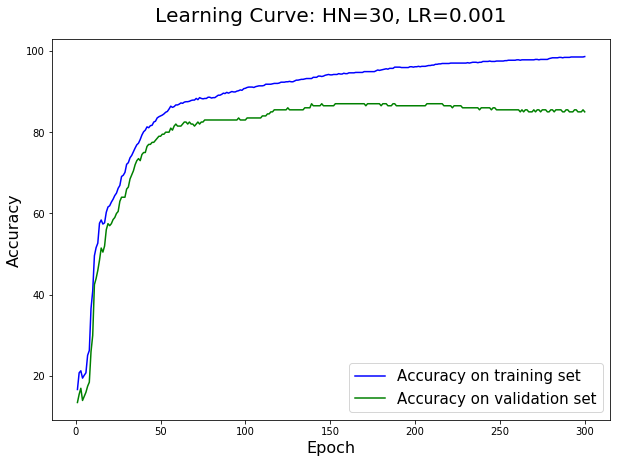

Training time: 33.52752685546875
MSE loss: 7.537197559570914e-05
XE loss: 3.686673577850037


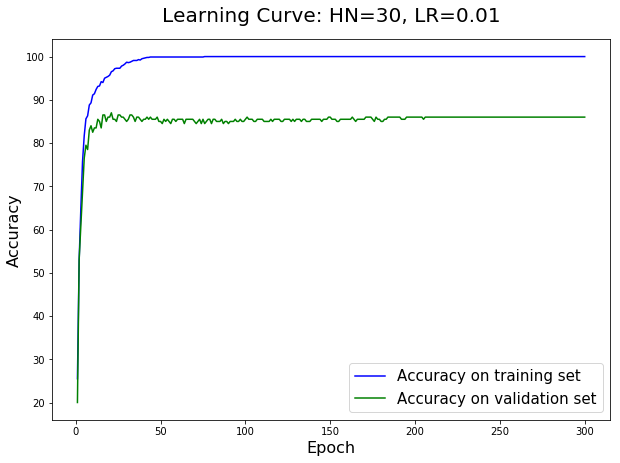

Training time: 31.216747522354126
MSE loss: 7.174936852595181e-07
XE loss: 0.29578854712626057


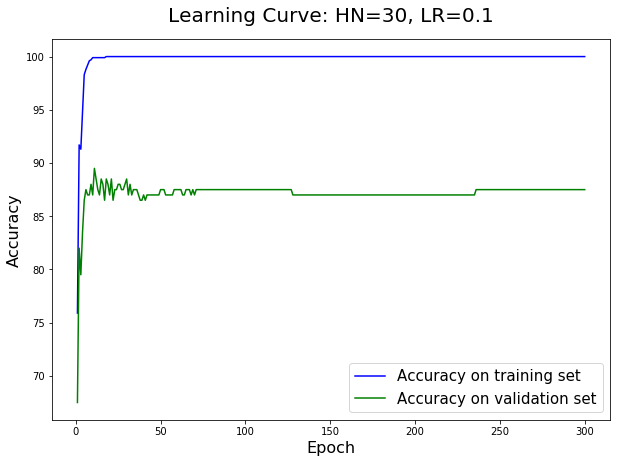

Training time: 31.179535388946533
MSE loss: 1.2145453746946904
XE loss: 4253.363859523939


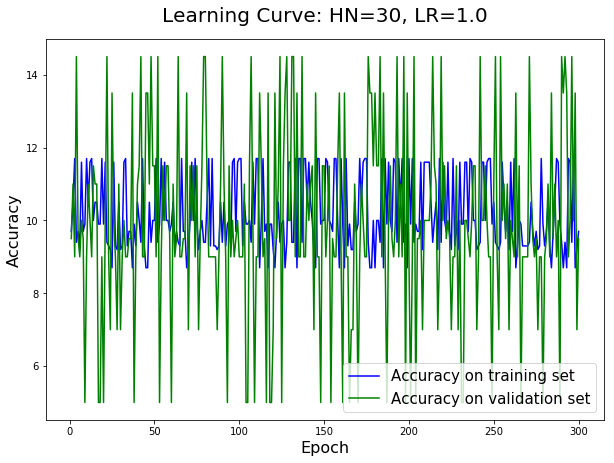

In [16]:
# 30 hidden neurons
hidden_layer_size = 30

# Build the NN
mnist_model_xe = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model_xe.W_input_to_hidden), deepcopy(mnist_model_xe.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model_xe.weights_init(*initial_weights)
    mnist_model_xe.train_xe(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 27.12433385848999
MSE loss: 0.047130436012089834
XE loss: 139.03049170038108


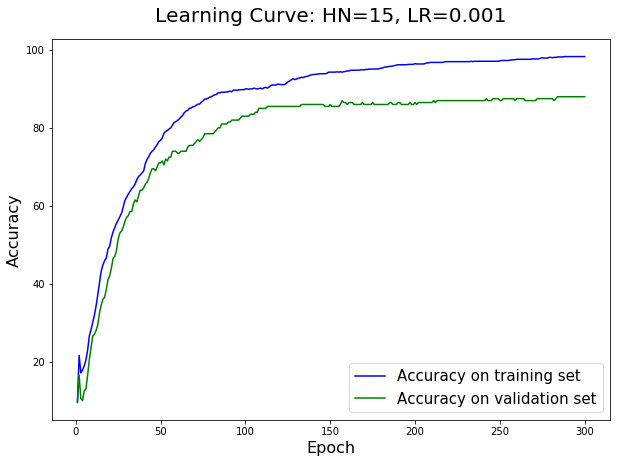

Training time: 26.68632173538208
MSE loss: 0.00020250909376483742
XE loss: 5.678898565967738


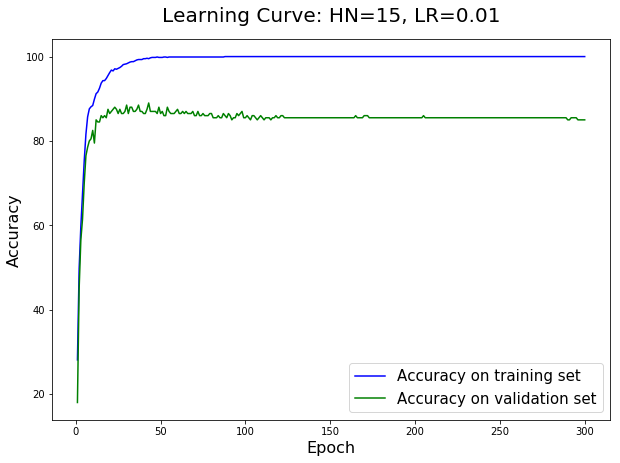

Training time: 27.266562938690186
MSE loss: 5.192976910446174e-06
XE loss: 0.5876557916277589


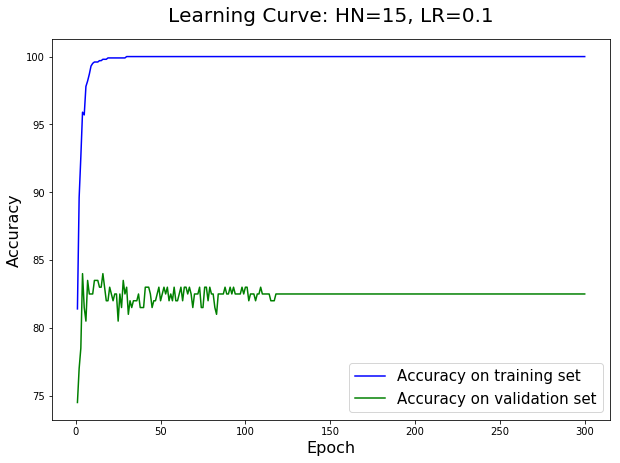

/mnt/workspace/Lab1/transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training time: 27.05769419670105
MSE loss: 0.9440392717197555
XE loss: 2610.5324267120386


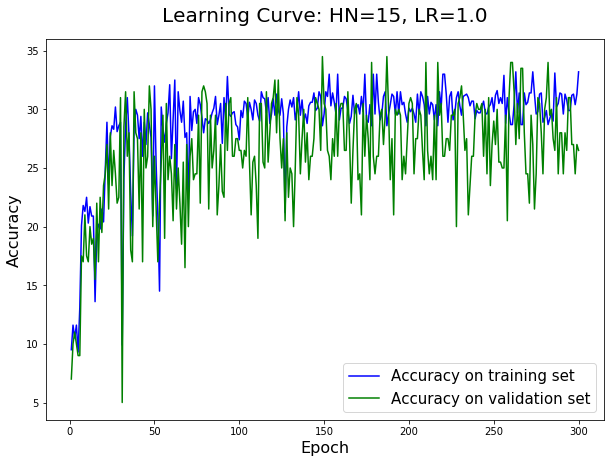

In [17]:
# 15 hidden neurons
hidden_layer_size = 15

# Build the NN
mnist_model_xe = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model_xe.W_input_to_hidden), deepcopy(mnist_model_xe.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model_xe.weights_init(*initial_weights)
    mnist_model_xe.train_xe(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

Training time: 38.5284378528595
MSE loss: 0.03656837065992283
XE loss: 102.63831084334505


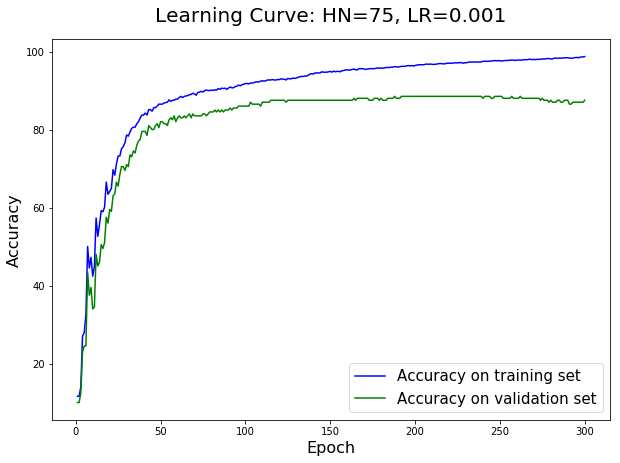

Training time: 36.79755473136902
MSE loss: 4.250311703835111e-05
XE loss: 2.749826433770618


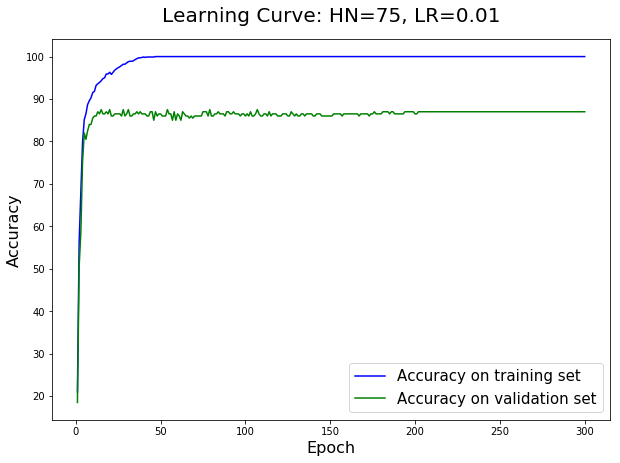

Training time: 38.42027735710144
MSE loss: 6.581536297040192e-07
XE loss: 0.2864036529921382


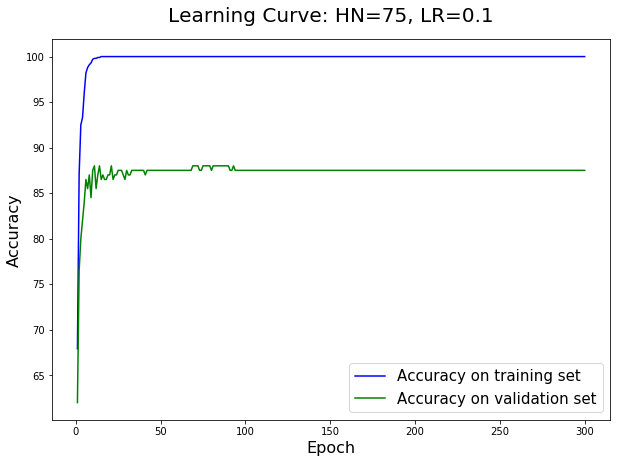

Training time: 37.19833755493164
MSE loss: 1.176829232187123
XE loss: 4004.3826997239285


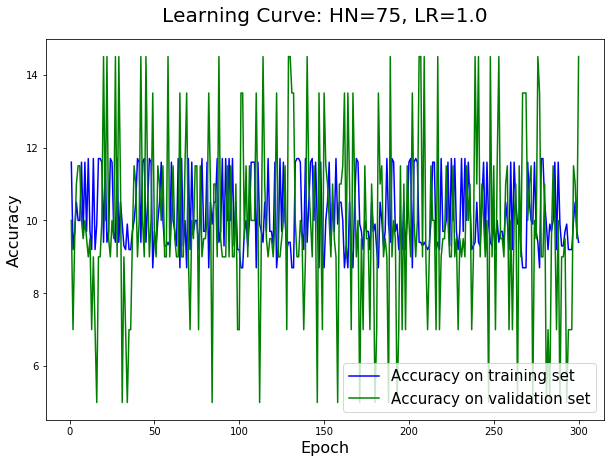

In [18]:
# 75 hidden neurons
hidden_layer_size = 75

# Build the NN
mnist_model_xe = NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)
initial_weights = deepcopy(mnist_model_xe.W_input_to_hidden), deepcopy(mnist_model_xe.W_hidden_to_output)
# Train NN and print accuracy on test data
for lr in learning_rates:
    mnist_model_xe.weights_init(*initial_weights)
    mnist_model_xe.train_xe(small_training_data, small_validation_data, learning_rate=lr, batch_size=batch_size)

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class="alert alert-warning">
<b>Answer</b>: simply looking at the loss values, it looks like that the cross-entropy one is much more greater. Actually, because of the formulas, the MSE loss is evaluated as an average: for this reason, we think that they cannot be compared as they are.<br><br>
Compared to the previous experiments, we see now that the learning rate has to be lower: 1.0 and 10.0 are too high and they lead to overflows (strong oscillations in the graphs and very poor overall results). Anyway, accuracies obtained now are slighly better than before.
</div>

# Beyond the notebook
<div class="alert alert-info">
As an extra activity, we are now going to implement our neural network using the PyTorch Python library. The reason is that we want to explore the ready-to-use available possibilities and become more familiar with them.<br><br>
In particular, we are going to implement the neural network with 75 hidden layer's neurons: we will train it over the small dataset, using
<ul>
    <li>the Stochastic Gradient Descent algorithm</li>
    <li>300 epochs</li>
    <li>0.01 as learning rate</li>
    <li>softmax as output activation function</li>
    <li>cross-entropy as loss function</li>
</ul>
</div>

In [22]:
import torch
from torch.autograd import Variable

ImportError: No module named 'torch'

<div class="alert alert-warning">
...Unfortunately, the PyTorch required library is not available!<br>
We provide anyway the code to define and train such a Neural Network, tested by us locally on our computers
</div>

```python
# N is batch size
# D_in is input dimension
# H is hidden dimension (we will consider 75, the best among the proposed ones)
# D_out is output dimension
N, D_in, H, D_out = len(small_training_data[0]), 784, 75, 10

# Our dataset will be: small_training_data
x = Variable(
    torch.FloatTensor(small_training_data[0])
)
y = Variable(
    # the optimizer requires targets to be an array 1xN, whose value are between 0 <= yi <= C-1
    # (where C is the number of classes we have)
    torch.LongTensor(np.argmax(small_training_data[1], axis=1)),
    requires_grad=False
)
# Our validation data will be: small_validation_data
valid_x = Variable(
    torch.FloatTensor(small_validation_data[0])
)
valid_y = Variable(
    # the optimizer requires targets to be an array 1xN, whose value are between 0 <= yi <= C-1
    # (where C is the number of classes we have)
    torch.LongTensor(np.argmax(small_validation_data[1], axis=1)),
    requires_grad=False
)

# Use the nn package to define our model and loss function.
# The Neural Network is the same used before
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax(dim=0)
)

# Loss function: cross-entropy
criterion = torch.nn.CrossEntropyLoss(size_average=False)
# Training algorithm
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# Train the network
start_time = time.time()
for _ in range(3000):
    # Forward pass
    y_pred = model(x)
    # Compute loss
    loss = criterion(y_pred, y)
    # Reset gradients and perform a backward pass
    optimizer.zero_grad()
    loss.backward()
    # Update the weights
    optimizer.step()
end_time = time.time()

print('Training completed in: {} seconds'.format(int(end_time - start_time)))

# print the accuracy
_, preds = torch.max(model(valid_x), 1)
print('Final accuracy: ')
print(100*len(torch.nonzero(valid_y - preds))/len(y), '%')
```

<div class="alert alert-warning">
The result we obtained is not satisfactory: the final accuracy is always very low (from 6 to 18%, according to the learning rate and/or the number of iterations we set as parameters).
This was the first time we have tried to use this library. Our opinion is that the structure of the program could be fine, but there is a bug somewhere: because of the deadline of the laboratory, we are not able to fix it now.<br>
<br>
We will try to gain more confidence with PyTorch and work on this bug in the near future
</div>

<div align="center"><b>THE END!</b>